In [12]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

In [2]:
# Read data from ICS and save as DF
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(path,
                names = ["age", "workclass","fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"],
                index_col=False)

/tmp/ipykernel_153/1164509495.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(path,


In [3]:
# show first 5 columns of df
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [4]:
# get rows & column count
df.shape

(32561, 14)

In [5]:
# exploring data set
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [6]:
# exploring data set
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

In [36]:
#make copy of og df
df_2=df.copy(deep=True)

In [37]:
df_2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [38]:
df_2['education-num'].mean()

10.0806793403151

In [41]:
data_chart1 = df_2.groupby('native-country')['education-num'].mean().reset_index(name='Avg Education-Num')
data_chart1

,native-country,Avg Education-Num
0,?,10.598628
1,Cambodia,8.789474
2,Canada,10.652893
3,China,11.120000
4,Columbia,9.372881
5,Cuba,9.600000
6,Dominican-Republic,7.114286
7,Ecuador,9.464286
8,El-Salvador,6.839623
9,England,11.011111


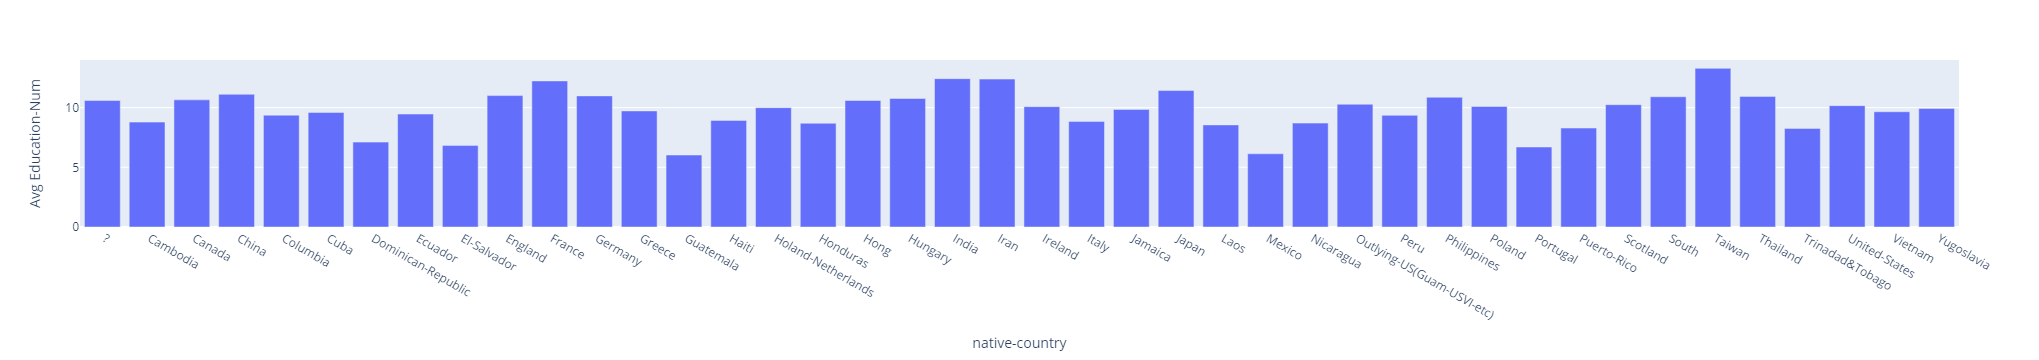

In [44]:
#Create bar chart aggregating avg education num by native country
fig = px.bar(data_chart1, x="native-country",y='Avg Education-Num')
fig.show()
